# Tugas Microfinance Loan 

In [2]:
# Importing all libraries that needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# # Read from csv data source
# df = pd.read_csv('Microfinance.csv', encoding="ISO-8859-1")
# df.sample(10)

# Read from Excel data source
dataset = pd.read_excel('Loan-Txn-ML-dataset.xlsx')
dataset


df = pd.DataFrame(dataset)
df.sample(10)

,LoanID,CustomerID,DOB,Occupation,Home Ownership,Township,Region,Issue Date,Expected End Date,Days Overdue,Term Months,Current Term Months,Installment,Outstanding,Loan Status,Loan Amount,Funded Amount,Interest Rate,LoanType,Purpose
317,ZL0194,CF1647,1990-07-14,Business Owner,Own,Bago,Bago,2023-10-30 00:00:00,2025-07-30,30,21,21,270000,270000,Late (16-30 days),3300000,2600000,0.12,Health & Emergency Loan,Health
1085,ZL1167,CF3954,1974-07-07,Business Owner,Family,Ngape,Magway,5/13/2023,2025-12-13,-106,31,27,135000,540000,Current,2000000,1300000,0.14,Home Improvement Loan,Household
121,ZL1459,CF1026,1967-08-29,Government Employee,Rent,Kyaukse,Mandalay,5/17/2023,2025-11-17,-80,30,27,225000,675000,Current,3000000,2100000,0.12,Agricultural Loan,Agriculture
1784,ZL0270,CF8262,1992-09-23,Freelancer,Own,Tharrawaddy,Bago,2023-12-14 00:00:00,2025-08-14,15,20,20,270000,270000,In Grace Period,3300000,800000,0.12,Personal Loan,Buying Car
345,ZL0431,CF1736,1989-06-13,Business Owner,Family,Magway,Magway,2022-08-13 00:00:00,2025-08-13,16,36,36,270000,270000,Late (16-30 days),3400000,1000000,0.12,SME Loan,Business
106,ZL1758,CF0104,1986-06-27,Freelancer,Family,South Okkalapa,Yangon,6/7/2023,2025-12-07,-100,30,26,270000,1080000,Current,3400000,2100000,0.12,Agricultural Loan,Agriculture
71,ZL1287,CF0069,1992-08-13,Farmer,Rent,Dawbon,Yangon,3/15/2023,2025-09-15,-17,30,29,180000,180000,Current,2500000,700000,0.13,Personal Loan,Moving
1690,ZL0547,CF7344,1985-02-26,Freelancer,Rent,Bago,Bago,2024-03-13 00:00:00,2025-05-13,108,14,17,135000,405000,Charged Off,2000000,1100000,0.14,Home Improvement Loan,Household
1632,ZL0677,CF6723,1982-02-28,Engineer,Family,Patheingyi,Mandalay,2024-01-12 00:00:00,2025-05-12,109,16,19,270000,810000,Charged Off,3200000,2900000,0.12,SME Loan,Business
1533,ZL0804,CF5975,1990-10-22,Farmer,Own,Minbu,Magway,2023-03-14 00:00:00,2025-05-14,107,26,29,180000,540000,Charged Off,2400000,600000,0.14,Personal Loan,Buying House


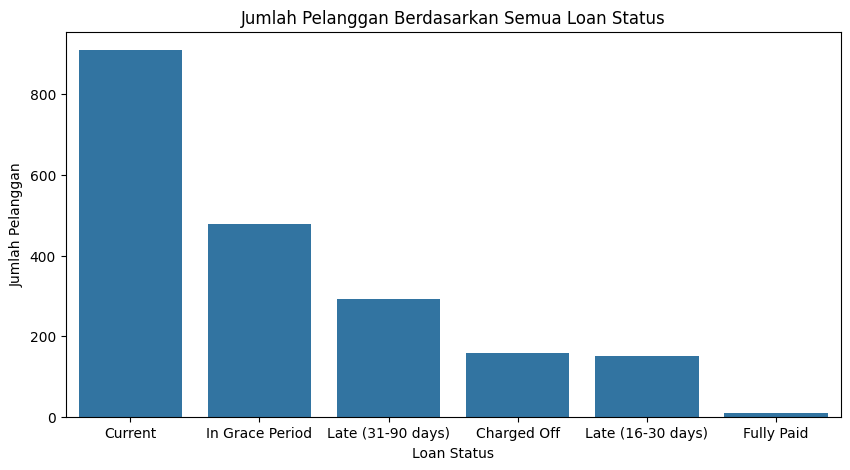

In [4]:
# 1. Tampilkan Bar Chart untuk Semua Status
all_status_counts = df['Loan Status'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=all_status_counts.index, y=all_status_counts.values)
plt.title('Jumlah Pelanggan Berdasarkan Semua Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Jumlah Pelanggan')
plt.show()

In [5]:
# 2. Ambil Region Tertinggi berdasarkan status yang dipilih
selected_status = ['Current', 'Fully Paid', 'In Grace Period']
top_regions = df[df['Loan Status'].isin(selected_status)]['Region'].value_counts()
top_regions

Region
Magway        326
Mandalay      274
Bago          248
Yangon        247
Sagaing       184
Shan          103
Ayeyarwady     10
Naypyidaw       5
Name: count, dtype: int64

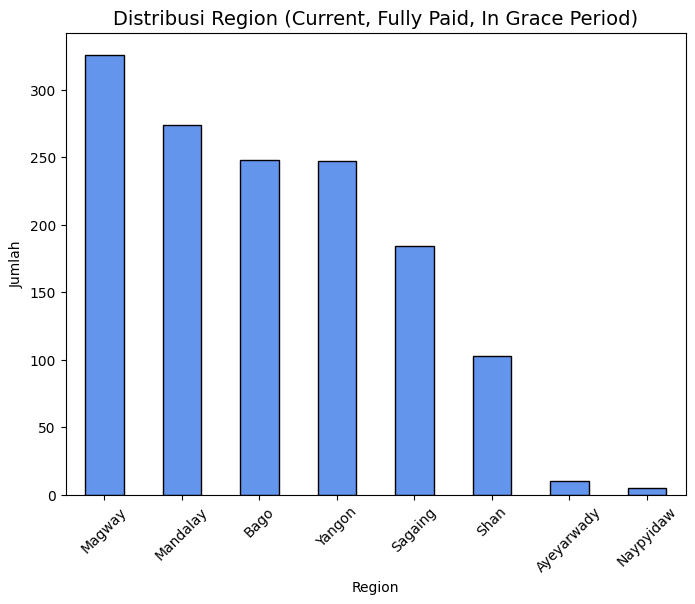

In [6]:
# Visualisasi Top Regions berdasarkan Loan Status yang dipilih
plt.figure(figsize=(8,6))
top_regions.plot(kind='bar', color='cornflowerblue', edgecolor='black')
 
plt.title("Distribusi Region (Current, Fully Paid, In Grace Period)", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

In [17]:
# 3. Filter data untuk top 5 region dan status yang dipilih
filtered_data = df[(df['Region'] == 'Magway') & (df['Loan Status'].isin(selected_status))]
filtered_data

,LoanID,CustomerID,DOB,Occupation,Home Ownership,Township,Region,Issue Date,Expected End Date,Days Overdue,Term Months,Current Term Months,Installment,Outstanding,Loan Status,Loan Amount,Funded Amount,Interest Rate,LoanType,Purpose
0,ZL1787,CF0001,1967-07-11,Private Company Employee,Family,Yenangyaung,Magway,10/18/2023,2026-02-18,-173,28,22,315000,1890000,Current,3800000,3100000,0.11,Agricultural Loan,Agriculture
10,ZL1953,CF0008,1992-05-27,Freelancer,Rent,Kamma,Magway,4/9/2024,2026-12-09,-467,32,16,135000,2160000,Current,1800000,600000,0.15,Agricultural Loan,Agriculture
32,ZL1766,CF0030,2000-06-30,Student,Family,Natmauk,Magway,11/16/2024,2027-02-16,-536,27,9,270000,4860000,Current,3200000,1800000,0.12,Agricultural Loan,Agriculture
44,ZL1978,CF0042,1964-05-23,Freelancer,Rent,Pauk,Magway,1/9/2024,2026-07-09,-314,30,19,135000,1485000,Current,2000000,1900000,0.14,Agricultural Loan,Agriculture
49,ZL1186,CF0047,1979-10-12,Freelancer,Family,Gangaw,Magway,3/16/2025,2027-10-16,-778,31,5,180000,4680000,Current,2500000,1800000,0.13,Agricultural Loan,Agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,ZL0164,CF9733,2000-07-01,Freelancer,Family,Ngape,Magway,2023-03-22 00:00:00,2025-08-22,7,29,29,225000,225000,In Grace Period,2700000,500000,0.13,Health & Emergency Loan,Health
1980,ZL0801,CF9873,1978-05-18,Government Employee,Own,Minbu,Magway,2024-08-26 00:00:00,2025-08-26,3,12,12,180000,180000,In Grace Period,2500000,1700000,0.13,SME Loan,Business
1983,ZL0994,CF9884,1997-08-30,Doctor,Own,Ngape,Magway,2023-03-22 00:00:00,2025-08-22,7,29,29,225000,225000,In Grace Period,2800000,2100000,0.13,Hire Purchase Loan,Major Purchase
1992,ZL0288,CF9961,1995-05-20,Doctor,Family,Salin,Magway,2022-12-26 00:00:00,2025-08-26,3,32,32,270000,270000,In Grace Period,3400000,2400000,0.12,Hire Purchase Loan,Major Purchase


C:\Users\72527\AppData\Local\Temp\ipykernel_8248\3109468288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Age'] = pd.to_datetime(filtered_data['Issue Date']).dt.year - pd.to_datetime(filtered_data['DOB'], format='%d/%m/%Y').dt.year
C:\Users\72527\AppData\Local\Temp\ipykernel_8248\3109468288.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Age Group'] = pd.cut(filtered_data['Age'], bins=bins, labels=labels, right=False)
C:\Users\72527\AppData\Local\Temp\ipykernel_8248\

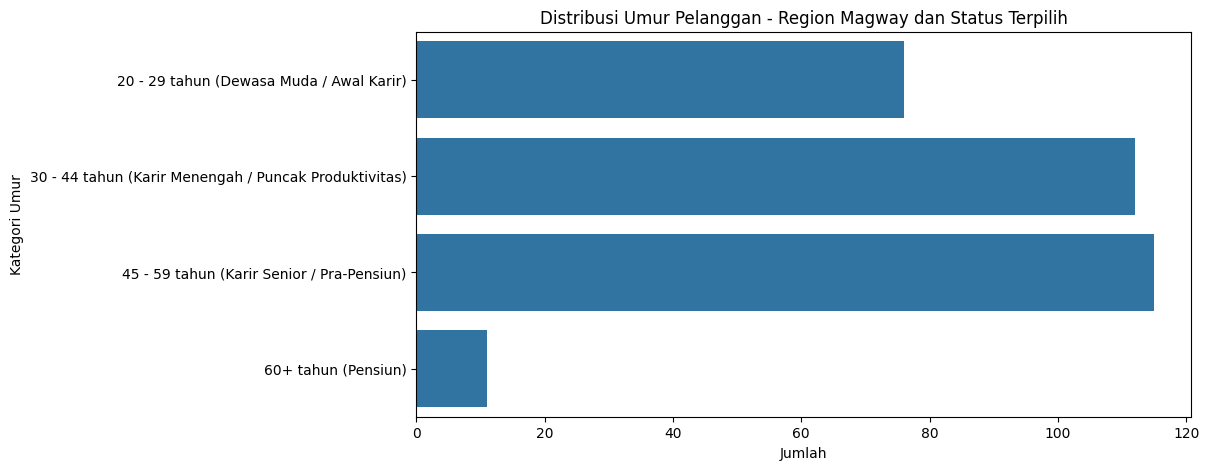

0       56
10      32
32      24
44      60
49      46
        ..
1965    23
1980    46
1983    26
1992    27
1999    37
Name: Age, Length: 326, dtype: int32

In [24]:
# 4. Profiling Berdasarkan Usia, Pekerjaan, Home Ownership, dan Purpose
# Menambahkan kolom umur
filtered_data['Age'] = pd.to_datetime(filtered_data['Issue Date']).dt.year - pd.to_datetime(filtered_data['DOB'], format='%d/%m/%Y').dt.year

# Membuat kategori umur
bins = [20, 30, 45, 60, float('inf')]
labels = ['20 - 29 tahun (Dewasa Muda / Awal Karir)', 
          '30 - 44 tahun (Karir Menengah / Puncak Produktivitas)', 
          '45 - 59 tahun (Karir Senior / Pra-Pensiun)', 
          '60+ tahun (Pensiun)']
filtered_data['Age Group'] = pd.cut(filtered_data['Age'], bins=bins, labels=labels, right=False)

# Mengurutkan kategori umur
age_order = ['20 - 29 tahun (Dewasa Muda / Awal Karir)', 
             '30 - 44 tahun (Karir Menengah / Puncak Produktivitas)', 
             '45 - 59 tahun (Karir Senior / Pra-Pensiun)', 
             '60+ tahun (Pensiun)']
filtered_data['Age Group'] = pd.Categorical(filtered_data['Age Group'], categories=age_order, ordered=True)

# Distribusi Umur
plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_data, y='Age Group', order=age_order)
plt.title('Distribusi Umur Pelanggan - Region Magway dan Status Terpilih')
plt.xlabel('Jumlah')
plt.ylabel('Kategori Umur')
plt.show()

filtered_data['Age']


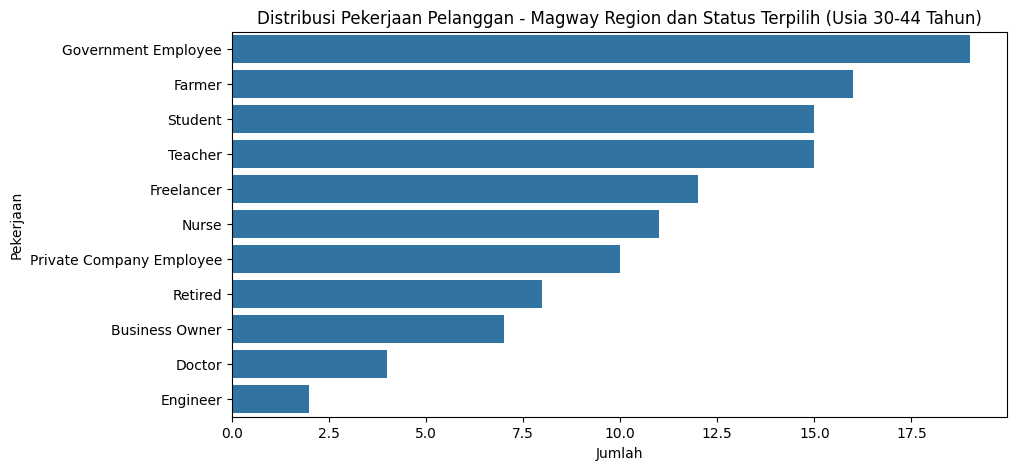

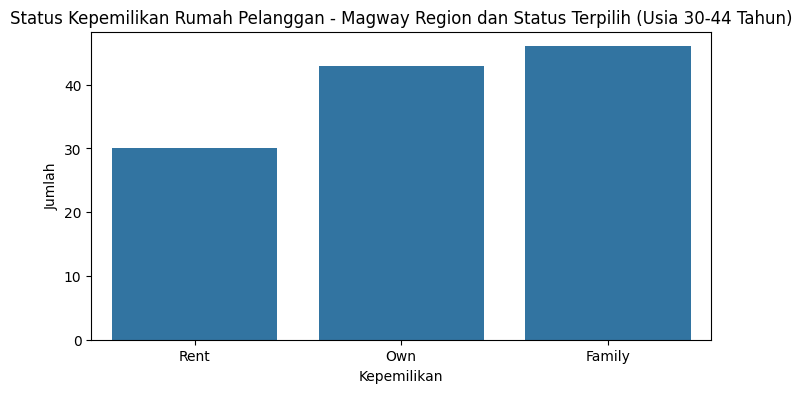

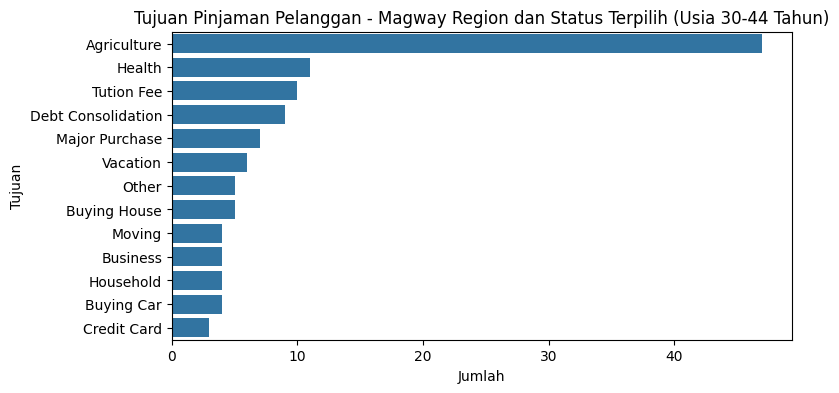

In [9]:
# Memfilter untuk usia 30-44 tahun
filtered_data = filtered_data[filtered_data['Age Group'] == '30 - 44 tahun (Karir Menengah / Puncak Produktivitas)']

# Analisis Pekerjaan
plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_data, y='Occupation', order=filtered_data['Occupation'].value_counts().index)
plt.title('Distribusi Pekerjaan Pelanggan - Magway Region dan Status Terpilih (Usia 30-44 Tahun)')
plt.xlabel('Jumlah')
plt.ylabel('Pekerjaan')
plt.show()

# Status kepemilikan rumah
plt.figure(figsize=(8, 4))
sns.countplot(data=filtered_data, x='Home Ownership')
plt.title('Status Kepemilikan Rumah Pelanggan - Magway Region dan Status Terpilih (Usia 30-44 Tahun)')
plt.xlabel('Kepemilikan')
plt.ylabel('Jumlah')
plt.show()

# Purpose
plt.figure(figsize=(8, 4))
sns.countplot(data=filtered_data, y='Purpose', order=filtered_data['Purpose'].value_counts().index)
plt.title('Tujuan Pinjaman Pelanggan - Magway Region dan Status Terpilih (Usia 30-44 Tahun)')
plt.xlabel('Jumlah')
plt.ylabel('Tujuan')
plt.show()

Top 4 Occupation:
Occupation
Government Employee    19
Farmer                 16
Student                15
Teacher                15
Name: count, dtype: int64


C:\Users\72527\AppData\Local\Temp\ipykernel_8248\3608935258.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


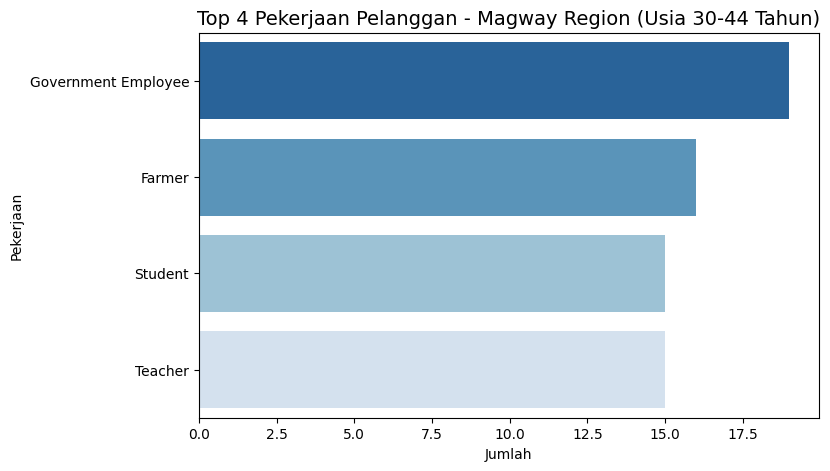

In [10]:
# Ambil Top 4 Occupation
top4_occupation = (
    filtered_data['Occupation']
    .value_counts()
    .head(4)
)

print("Top 4 Occupation:")
print(top4_occupation)

# Visualisasi Top 4 Occupation
plt.figure(figsize=(8,5))
sns.barplot(
    x=top4_occupation.values,
    y=top4_occupation.index,
    palette="Blues_r"
)
plt.title("Top 4 Pekerjaan Pelanggan - Magway Region (Usia 30-44 Tahun)", fontsize=14)
plt.xlabel("Jumlah")
plt.ylabel("Pekerjaan")
plt.show()


Home Ownership untuk masing-masing Occupation (Top 4):
Home Ownership       Family  Own  Rent
Occupation                            
Farmer                    5    5     6
Government Employee       5    9     5
Student                  15    0     0
Teacher                   4    4     7


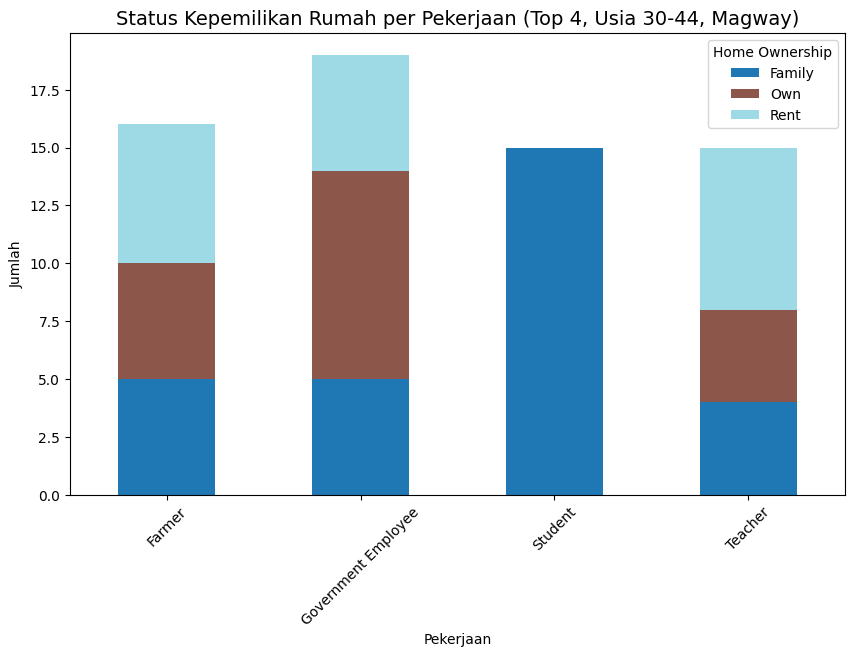

In [11]:
# Ambil top 4 occupation dulu
top4_occupation = filtered_data['Occupation'].value_counts().head(4).index

# Filter hanya untuk top 4
top4_data = filtered_data[filtered_data['Occupation'].isin(top4_occupation)]

# Buat tabulasi Occupation vs Home Ownership
ownership_by_occ = pd.crosstab(top4_data['Occupation'], top4_data['Home Ownership'])

print("Home Ownership untuk masing-masing Occupation (Top 4):")
print(ownership_by_occ)

# Visualisasi stacked bar chart
ownership_by_occ.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap="tab20"
)

plt.title("Status Kepemilikan Rumah per Pekerjaan (Top 4, Usia 30-44, Magway)", fontsize=14)
plt.xlabel("Pekerjaan")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.legend(title="Home Ownership")
plt.show()



Top 4 Purpose untuk Government Employee:
Purpose
Agriculture    7
Tution Fee     3
Credit Card    3
Health         2
Name: count, dtype: int64

Top 4 Purpose untuk Farmer:
Purpose
Agriculture     3
Other           2
Buying House    2
Household       2
Name: count, dtype: int64

Top 4 Purpose untuk Student:
Purpose
Agriculture       6
Major Purchase    3
Health            2
Business          1
Name: count, dtype: int64

Top 4 Purpose untuk Teacher:
Purpose
Agriculture           4
Debt Consolidation    4
Tution Fee            2
Health                1
Name: count, dtype: int64


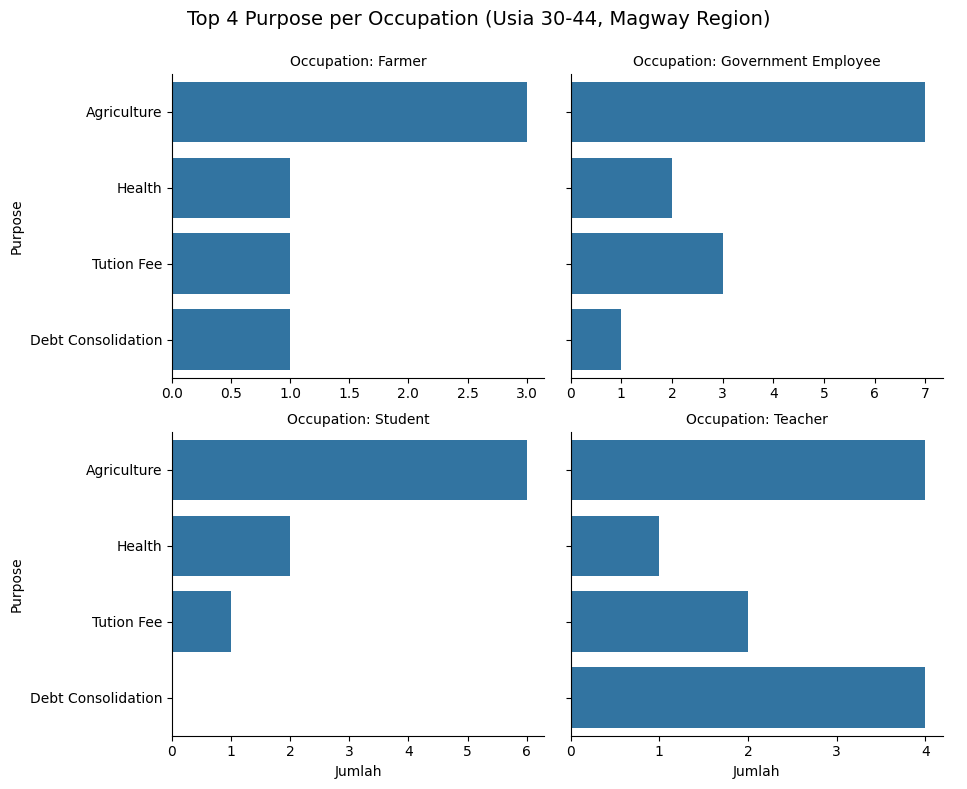

In [12]:
# Ambil top 4 occupation
top4_occupation = filtered_data['Occupation'].value_counts().head(4).index

# Filter hanya untuk top 4
top4_data = filtered_data[filtered_data['Occupation'].isin(top4_occupation)]

# Buat dictionary hasil top 4 purpose tiap occupation
top4_purpose_per_occ = {}

for occ in top4_occupation:
    occ_data = top4_data[top4_data['Occupation'] == occ]
    top4_purpose = occ_data['Purpose'].value_counts().head(4)
    top4_purpose_per_occ[occ] = top4_purpose

# Print hasil
for occ, purposes in top4_purpose_per_occ.items():
    print(f"\nTop 4 Purpose untuk {occ}:")
    print(purposes)

# Visualisasi dengan FacetGrid
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    data=top4_data,
    kind="count",
    y="Purpose",
    col="Occupation",
    order=filtered_data['Purpose'].value_counts().head(4).index,  # urut berdasarkan 4 terbesar global
    col_wrap=2,
    sharex=False,
    height=4,
    aspect=1.2
)

g.set_titles("Occupation: {col_name}")
g.set_axis_labels("Jumlah", "Purpose")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Top 4 Purpose per Occupation (Usia 30-44, Magway Region)", fontsize=14)
plt.show()


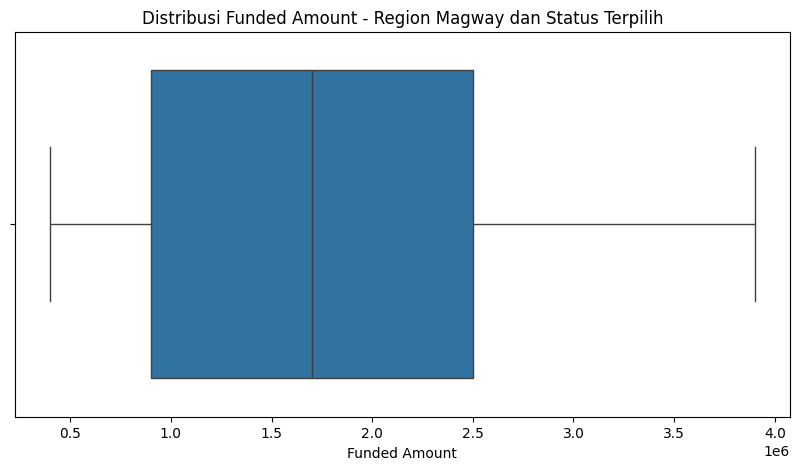

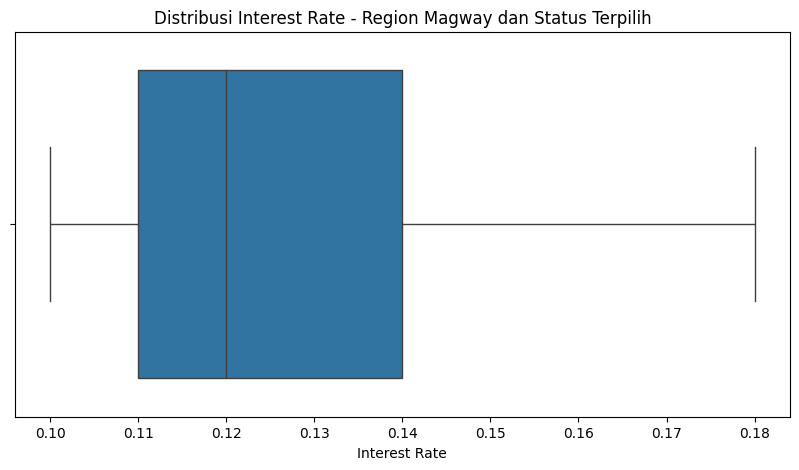

In [13]:
# 5. Analisis Terkait Pinjaman
# Funded Amount
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_data, x='Funded Amount')
plt.title('Distribusi Funded Amount - Region Magway dan Status Terpilih')
plt.xlabel('Funded Amount')
plt.show()

# Interest Rate
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_data, x='Interest Rate')
plt.title('Distribusi Interest Rate - Region Magway dan Status Terpilih')
plt.xlabel('Interest Rate')
plt.show()

# JOIN TABLE ML-DATASET DENGAN LOAN CUSTOMER

In [14]:
df_cust = pd.read_excel('Loan-Cust.xlsx')
df_cust

,CustomerID,Name,NRC,DOB,Township Code,Occupation,Home Ownership,Avg Monthly Income
0,CF0078,Phoo Thandar,13/MAPANA(N)xxxxxx,1985-10-17,MMR0089,Business Owner,Family,3100000
1,CF6954,Nu Nu Kyi,5/DAHANA(N)xxxxxx,1983-06-28,MMR0127,Business Owner,Family,3200000
2,CF4653,Sett Sandar,2/DAMASA(N)xxxxxx,1982-11-21,MMR0132,Business Owner,Own,3200000
3,CF2040,Yati Myae,12/AHLANA(N)xxxxxx,1992-11-28,MMR0101,Business Owner,Family,3200000
4,CF0054,Khun Moe,4/MATANA(N)xxxxxx,1995-06-10,MMR0130,Business Owner,Own,3200000
...,...,...,...,...,...,...,...,...
1830,CF9496,Ye Maung,12/DALANA(N)xxxxxx,1969-01-27,MMR0005,Teacher,Rent,550000
1831,CF9542,Hnin Si Min Thant,11/AHMANA(N)xxxxxx,1988-05-14,MMR0028,Teacher,Rent,660000
1832,CF9743,Thitsar Thet,9/MAKHANA(N)xxxxxx,1972-03-28,MMR0088,Teacher,Rent,550000
1833,CF9791,Thura Paing,2/MASANA(N)xxxxxx,1996-06-05,MMR0005,Teacher,Family,440000


In [15]:
merge_df = pd.merge(top4_data, df_cust[['CustomerID', 'Avg Monthly Income']], on='CustomerID', how='left')
merge_df.columns

Index(['LoanID', 'CustomerID', 'DOB', 'Occupation', 'Home Ownership',
       'Township', 'Region', 'Issue Date', 'Expected End Date', 'Days Overdue',
       'Term Months', 'Current Term Months', 'Installment', 'Outstanding',
       'Loan Status', 'Loan Amount', 'Funded Amount', 'Interest Rate',
       'LoanType', 'Purpose', 'Age', 'Age Group', 'Avg Monthly Income'],
      dtype='object')

## Average Loan Amount di Top 4 Occupation di Magway

C:\Users\72527\AppData\Local\Temp\ipykernel_8248\683429835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_loan.values, y=avg_loan.index, palette="viridis")


NameError: name 'mticker' is not defined

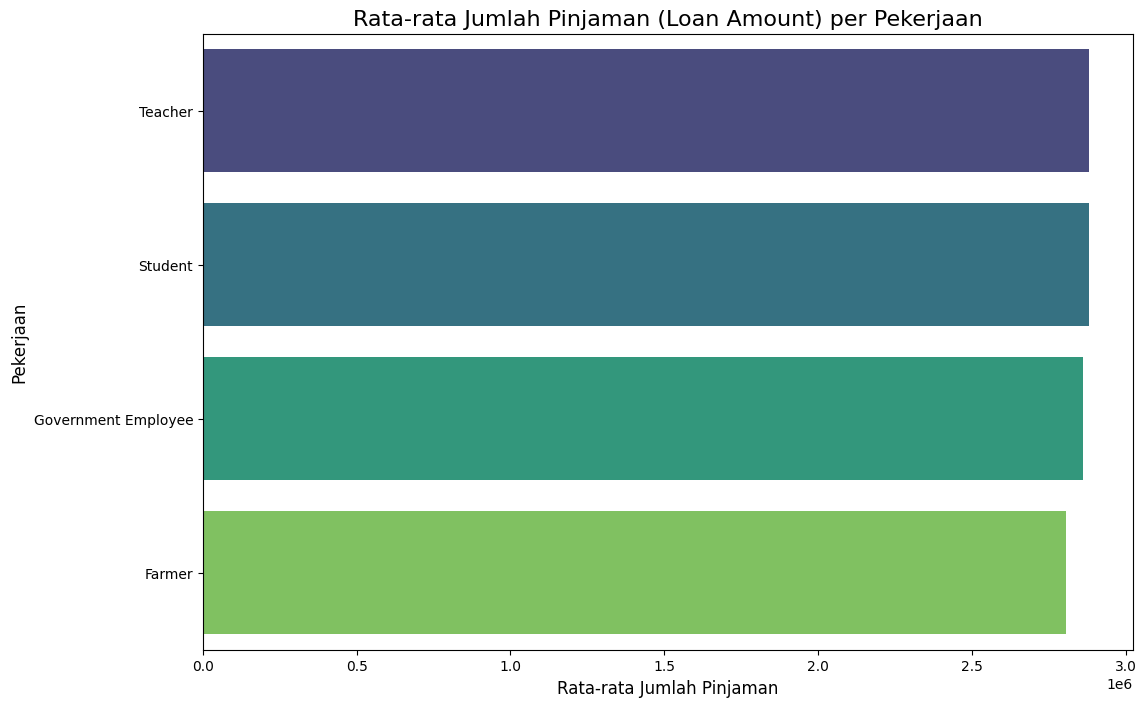

In [16]:
avg_loan = merge_df.groupby('Occupation')['Loan Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_loan.values, y=avg_loan.index, palette="viridis")

plt.title('Rata-rata Jumlah Pinjaman (Loan Amount) per Pekerjaan', fontsize=16)
plt.xlabel('Rata-rata Jumlah Pinjaman', fontsize=12)
plt.ylabel('Pekerjaan', fontsize=12)

# Format sumbu-x agar mudah dibaca (dengan pemisah ribuan)
formatter = mticker.FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.savefig('seaborn_avg_loan.png')
plt.show()

avg_loan

## Average Monthly Income di Top 4 Occupation di Magway

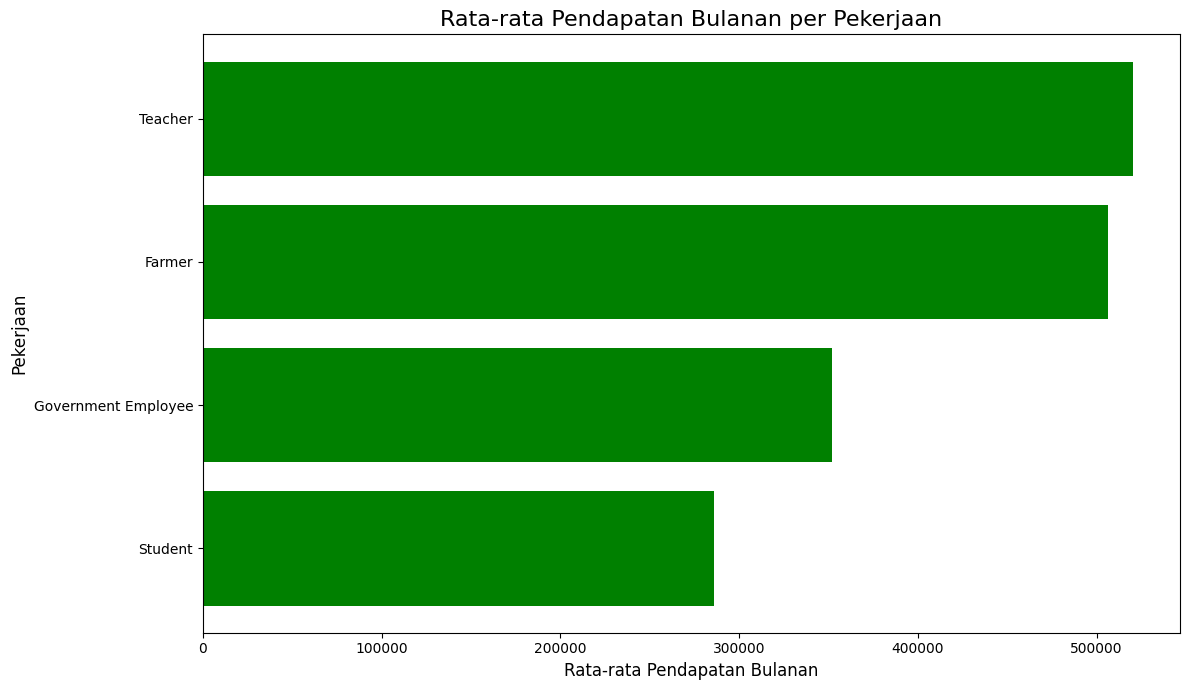

In [ ]:
avg_income = merge_df.groupby('Occupation')['Avg Monthly Income'].mean().sort_values()
#
# Buat plot
plt.figure(figsize=(12, 7))
plt.barh(avg_income.index, avg_income.values, color='green')
plt.title('Rata-rata Pendapatan Bulanan per Pekerjaan', fontsize=16)
plt.xlabel('Rata-rata Pendapatan Bulanan', fontsize=12)
plt.ylabel('Pekerjaan', fontsize=12)
plt.tight_layout()
plt.savefig('mpl_avg_income_by_occupation.png')
plt.show()

## Average Term Month di Top 4 Occupation di Magway

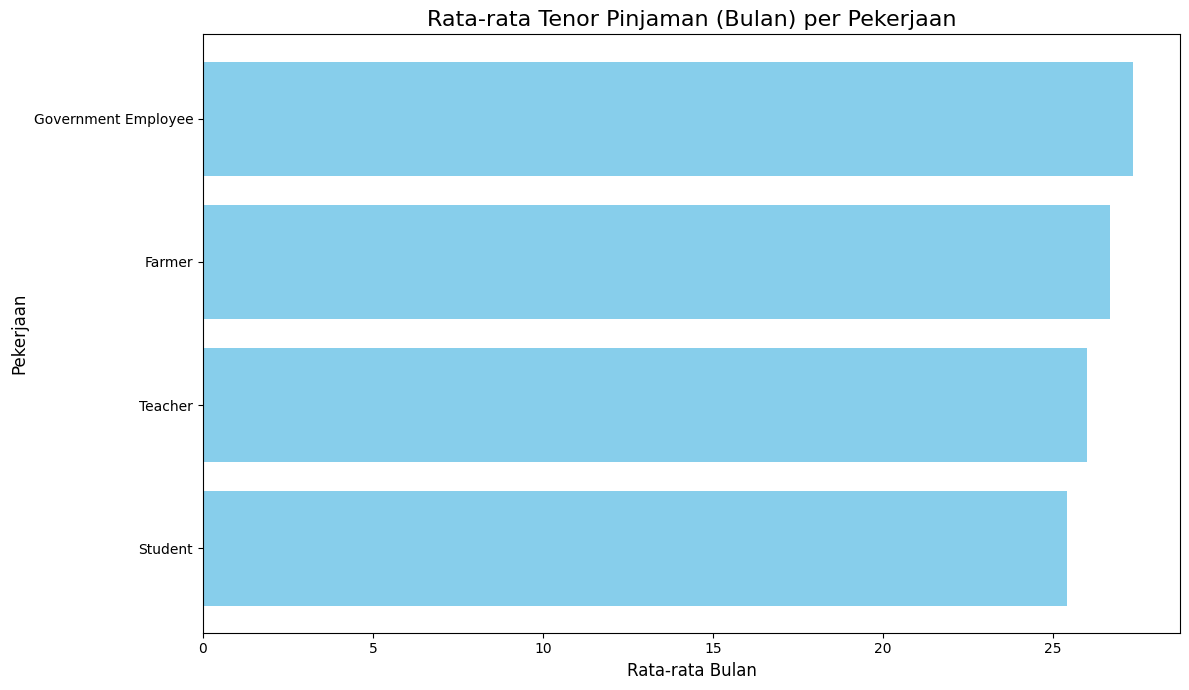

In [ ]:
avg_term = merge_df.groupby('Occupation')['Term Months'].mean().sort_values()

    # Buat plot
plt.figure(figsize=(12, 7))
plt.barh(avg_term.index, avg_term.values, color='skyblue')
plt.title('Rata-rata Tenor Pinjaman (Bulan) per Pekerjaan', fontsize=16)
plt.xlabel('Rata-rata Bulan', fontsize=12)
plt.ylabel('Pekerjaan', fontsize=12)
plt.tight_layout()
plt.savefig('mpl_avg_term_by_occupation.png')
plt.show()

## Average Interest Rate di Top 4 Occupation di Magway

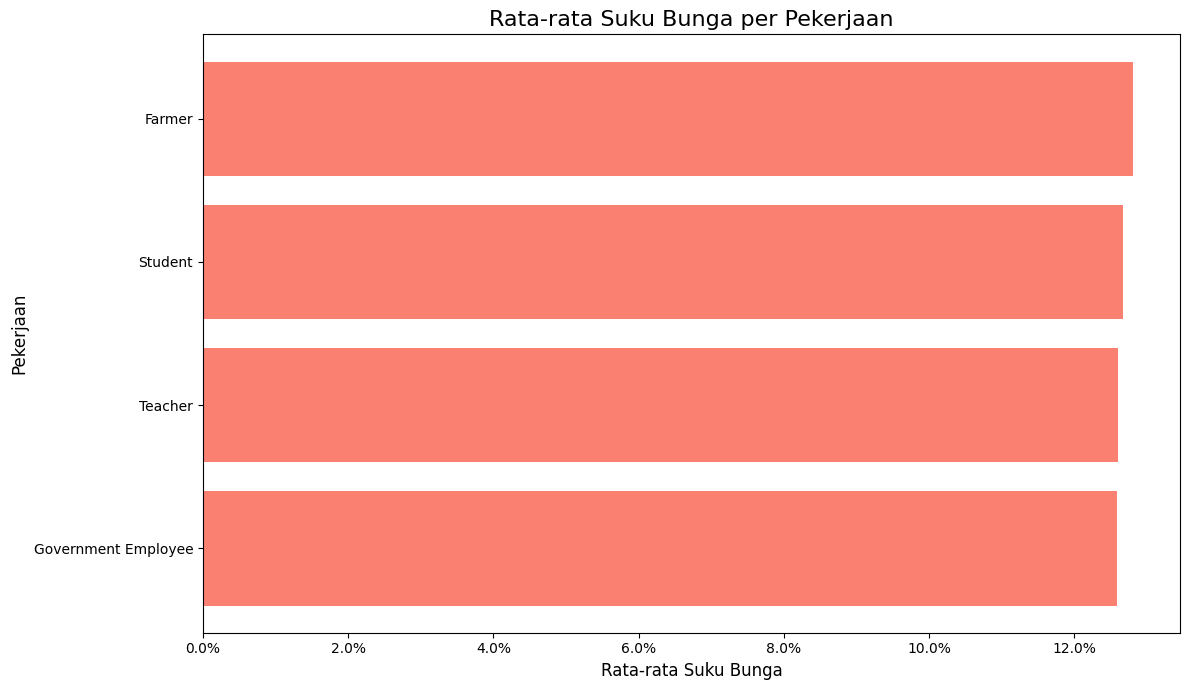

In [ ]:
avg_rate = merge_df.groupby('Occupation')['Interest Rate'].mean().sort_values()

    # Buat plot
plt.figure(figsize=(12, 7))
plt.barh(avg_rate.index, avg_rate.values, color='salmon')
plt.title('Rata-rata Suku Bunga per Pekerjaan', fontsize=16)
plt.xlabel('Rata-rata Suku Bunga', fontsize=12)
plt.ylabel('Pekerjaan', fontsize=12)

# Format sumbu-x sebagai persentase
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1%}'))

plt.tight_layout()
plt.savefig('mpl_avg_rate_by_occupation.png')
plt.show()

In [ ]:
merge_df2 = pd.merge(df, df_cust[['CustomerID', 'Avg Monthly Income']], on='CustomerID', how='left')
merge_df2.columns

Index(['LoanID', 'CustomerID', 'DOB', 'Occupation', 'Home Ownership',
       'Township', 'Region', 'Issue Date', 'Expected End Date', 'Days Overdue',
       'Term Months', 'Current Term Months', 'Installment', 'Outstanding',
       'Loan Status', 'Loan Amount', 'Funded Amount', 'Interest Rate',
       'LoanType', 'Purpose', 'Avg Monthly Income'],
      dtype='object')

# ini cuma iseng doang

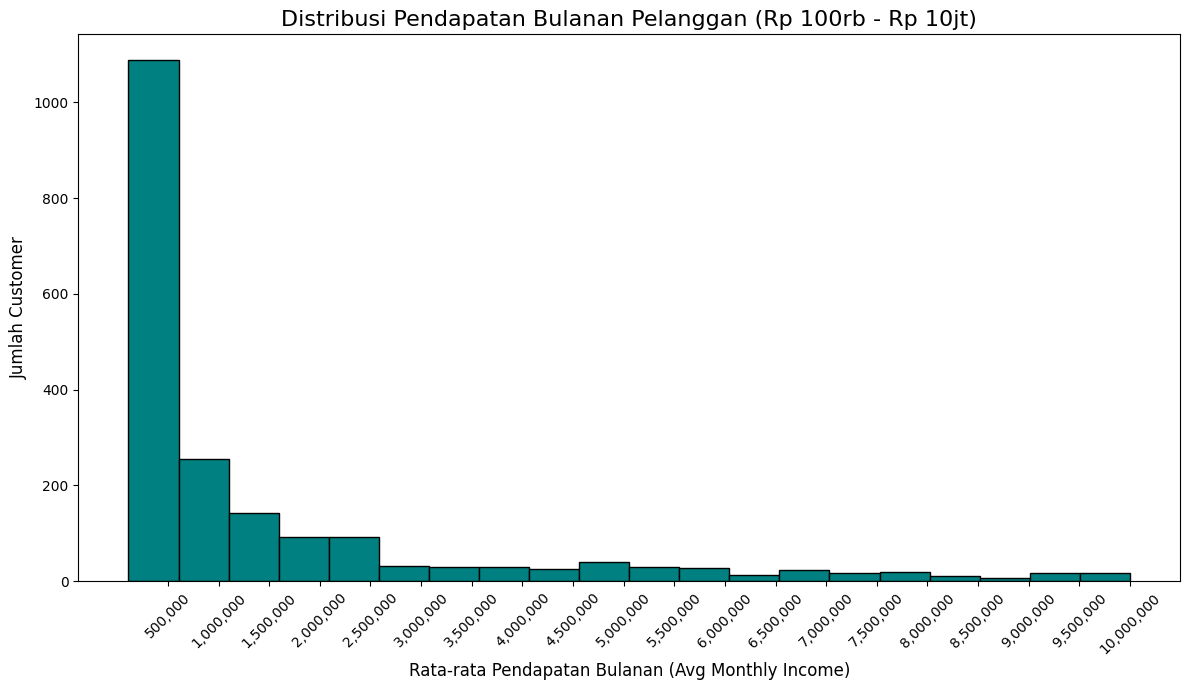

In [ ]:
import matplotlib.ticker as mticker 

income_range_df = merge_df2[
        (merge_df2['Avg Monthly Income'] >= 100000) & 
        (merge_df2['Avg Monthly Income'] <= 10000000)
]
plt.figure(figsize=(12, 7))
        
        # Menggunakan plt.hist() untuk membuat histogram
plt.hist(income_range_df['Avg Monthly Income'], bins=20, color='teal', edgecolor='black')

# 3. Menambahkan judul dan label
plt.title('Distribusi Pendapatan Bulanan Pelanggan (Rp 100rb - Rp 10jt)', fontsize=16)
plt.xlabel('Rata-rata Pendapatan Bulanan (Avg Monthly Income)', fontsize=12)
plt.ylabel('Jumlah Customer', fontsize=12)

formatter = mticker.FuncFormatter(lambda x, p: format(int(x), ','))

# 2. Terapkan formatter ke sumbu-x
plt.gca().xaxis.set_major_formatter(formatter)
# ---- AKHIR PERUBAHAN ----

# Format sumbu-x agar lebih mudah dibaca
ticks_interval = range(500000, 10000001, 500000)
plt.xticks(ticks=ticks_interval, rotation=45)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('income_distribution_histogram.png')
plt.show()